# **Categorical Variable Encoding**

Las variables categóricas se pueden dividir en dos categorías: nominales (sin orden particular) y ordinales (algunas ordenadas).

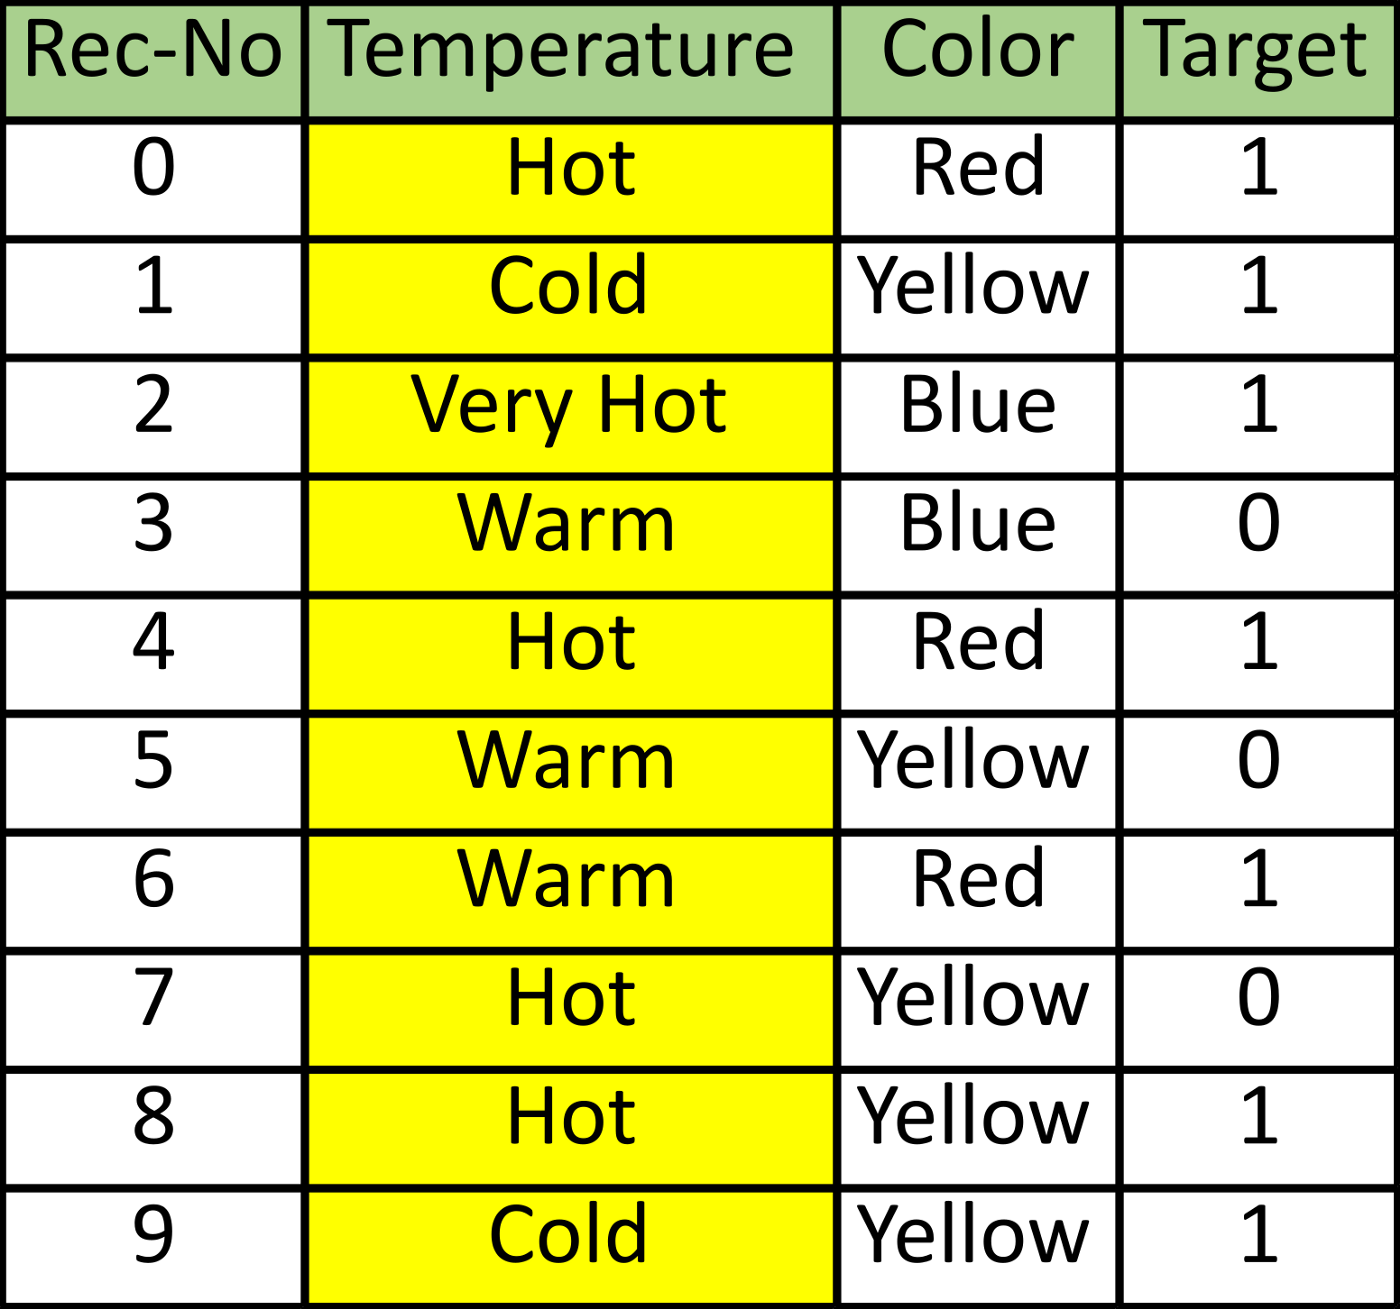

In [28]:
import pandas as pd
import numpy as np

data={'Temperature':['Hot','Cold','Very Hot','Warm','Hot','Warm','Warm','Hot','Hot','Cold'],
      'Color':['Red','Yellow','Blue','Blue','Red','Yellow','Red','Yellow','Yellow','Yellow'],
      'Target':[1,1,1,0,1,0,1,0,1,1]}

df = pd.DataFrame(data, columns = ['Temperature', 'Color', 'Target'])
df

,Temperature,Color,Target
0,Hot,Red,1
1,Cold,Yellow,1
2,Very Hot,Blue,1
3,Warm,Blue,0
4,Hot,Red,1
5,Warm,Yellow,0
6,Warm,Red,1
7,Hot,Yellow,0
8,Hot,Yellow,1
9,Cold,Yellow,1


**One Hot Encoding**

En este método, asignamos cada categoría a un vector que contiene 1 y 0, lo que denota la presencia o ausencia de la variable. El número de vectores depende del número de categorías por variable. Este método produce muchas columnas que ralentizan significativamente el aprendizaje si el número de la categoría es muy alto para la función. Pandas tiene la función get_dummies, que es bastante fácil de usar.

In [29]:
df = pd.get_dummies(df, prefix=['Temp'], columns=['Temperature'])
df

,Color,Target,Temp_Cold,Temp_Hot,Temp_Very Hot,Temp_Warm
0,Red,1,0,1,0,0
1,Yellow,1,1,0,0,0
2,Blue,1,0,0,1,0
3,Blue,0,0,0,0,1
4,Red,1,0,1,0,0
5,Yellow,0,0,0,0,1
6,Red,1,0,0,0,1
7,Yellow,0,0,1,0,0
8,Yellow,1,0,1,0,0
9,Yellow,1,1,0,0,0


In [30]:
data={'Temperature':['Hot','Cold','Very Hot','Warm','Hot','Warm','Warm','Hot','Hot','Cold'],
      'Color':['Red','Yellow','Blue','Blue','Red','Yellow','Red','Yellow','Yellow','Yellow'],
      'Target':[1,1,1,0,1,0,1,0,1,1]}

df = pd.DataFrame(data, columns = ['Temperature', 'Color', 'Target'])
df

,Temperature,Color,Target
0,Hot,Red,1
1,Cold,Yellow,1
2,Very Hot,Blue,1
3,Warm,Blue,0
4,Hot,Red,1
5,Warm,Yellow,0
6,Warm,Red,1
7,Hot,Yellow,0
8,Hot,Yellow,1
9,Cold,Yellow,1


In [31]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(df.Temperature.values.reshape(-1, 1)).toarray() #El array resultante solo tiene una columna
#print(ohe)
dfOneHot = pd.DataFrame(ohe, columns=["Temp_" + str(ohc.categories_[0][i])
                                                for i in range(len(ohc.categories_[0]))])

dfh = pd.concat([df, dfOneHot], axis=1)
dfh

,Temperature,Color,Target,Temp_Cold,Temp_Hot,Temp_Very Hot,Temp_Warm
0,Hot,Red,1,0.0,1.0,0.0,0.0
1,Cold,Yellow,1,1.0,0.0,0.0,0.0
2,Very Hot,Blue,1,0.0,0.0,1.0,0.0
3,Warm,Blue,0,0.0,0.0,0.0,1.0
4,Hot,Red,1,0.0,1.0,0.0,0.0
5,Warm,Yellow,0,0.0,0.0,0.0,1.0
6,Warm,Red,1,0.0,0.0,0.0,1.0
7,Hot,Yellow,0,0.0,1.0,0.0,0.0
8,Hot,Yellow,1,0.0,1.0,0.0,0.0
9,Cold,Yellow,1,1.0,0.0,0.0,0.0


**Label Encoding**

En esta codificación, a cada categoría se le asigna un valor de 1 a N (donde N es el número de categorías para la variable)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
data={'Temperature':['Hot','Cold','Very Hot','Warm','Hot','Warm','Warm','Hot','Hot','Cold'],
      'Color':['Red','Yellow','Blue','Blue','Red','Yellow','Red','Yellow','Yellow','Yellow'],
      'Target':[1,1,1,0,1,0,1,0,1,1]}

df = pd.DataFrame(data, columns = ['Temperature', 'Color', 'Target'])

In [34]:
df['Temp_label_encoded'] = LabelEncoder().fit_transform(df.Temperature)
df

,Temperature,Color,Target,Temp_label_encoded
0,Hot,Red,1,1
1,Cold,Yellow,1,0
2,Very Hot,Blue,1,2
3,Warm,Blue,0,3
4,Hot,Red,1,1
5,Warm,Yellow,0,3
6,Warm,Red,1,3
7,Hot,Yellow,0,1
8,Hot,Yellow,1,1
9,Cold,Yellow,1,0


In [35]:
data={'Temperature':['Hot','Cold','Very Hot','Warm','Hot','Warm','Warm','Hot','Hot','Cold'],
      'Color':['Red','Yellow','Blue','Blue','Red','Yellow','Red','Yellow','Yellow','Yellow'],
      'Target':[1,1,1,0,1,0,1,0,1,1]}

df = pd.DataFrame(data, columns = ['Temperature', 'Color', 'Target'])

In [36]:
df.loc[:, 'Temp_factorize_encode'] = pd.factorize(df['Temperature'])[0].reshape(-1,1)
df

,Temperature,Color,Target,Temp_factorize_encode
0,Hot,Red,1,0
1,Cold,Yellow,1,1
2,Very Hot,Blue,1,2
3,Warm,Blue,0,3
4,Hot,Red,1,0
5,Warm,Yellow,0,3
6,Warm,Red,1,3
7,Hot,Yellow,0,0
8,Hot,Yellow,1,0
9,Cold,Yellow,1,1


**Frequency Encoding**

Se utiliza la frecuencia de las categorías como etiquetas. En los casos en que la frecuencia está relacionada de alguna manera con la variable objetivo, ayuda al modelo a comprender y asignar el peso en proporción directa e inversa, según la naturaleza de los datos. 

Se requieren tres pasos para esto:

Seleccione una variable categórica que le gustaría transformar

Agrupe por la variable categórica y obtenga la cantidad de filas de cada categoría

Agregarlo al conjunto de datos de entrenamiento

In [37]:
data={'Temperature':['Hot','Cold','Very Hot','Warm','Hot','Warm','Warm','Hot','Hot','Cold'],
      'Color':['Red','Yellow','Blue','Blue','Red','Yellow','Red','Yellow','Yellow','Yellow'],
      'Target':[1,1,1,0,1,0,1,0,1,1]}

df = pd.DataFrame(data, columns = ['Temperature', 'Color', 'Target'])

In [38]:
fe = df.groupby('Temperature').size()/len(df)
df.loc[:,'Temp_freq_encode'] = df['Temperature'].map(fe)
df

,Temperature,Color,Target,Temp_freq_encode
0,Hot,Red,1,0.4
1,Cold,Yellow,1,0.2
2,Very Hot,Blue,1,0.1
3,Warm,Blue,0,0.3
4,Hot,Red,1,0.4
5,Warm,Yellow,0,0.3
6,Warm,Red,1,0.3
7,Hot,Yellow,0,0.4
8,Hot,Yellow,1,0.4
9,Cold,Yellow,1,0.2
